## The data given in the url  is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to predict whether client will subscribe to term deposit


### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipynb.fs.full.evaluation_formulas import accuracy

# reading dataset from csv file & storing pandas dataframe
bank_data = pd.read_csv('bank.csv', sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
bank_data.isna().sum()       # checking null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
# mapping target variable i.e. column 'y' to 0 & 1
# mapping  'no' -> 0  &  'yes' -> 1
bank_data.loc[bank_data['y'] == 'no', 'y'] = 0
bank_data.loc[bank_data['y'] == 'yes', 'y']= 1
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


#### Checking all features have contributed to target variable or not

In [4]:
# checking numeric columns variation with target variable
bank_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [5]:
bank_data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,0.145833
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,0.099035
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,0.139632


In [6]:
bank_data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604


In [7]:
bank_data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,0.226190


In [8]:
bank_data.groupby('poutcome').mean()

,age,balance,day,duration,campaign,pdays,previous,y
poutcome,,,,,,,,
failure,41.555102,1644.646939,14.395918,254.383673,1.955102,243.167347,2.851020,0.128571
other,39.873096,1424.472081,15.101523,273.832487,2.350254,219.385787,3.385787,0.192893
success,44.170543,1949.410853,14.581395,338.635659,1.736434,163.713178,3.015504,0.643411
unknown,41.083671,1374.862078,16.205938,262.103104,2.964912,-1.000000,0.000000,0.090958


In [9]:
bank_data.groupby('housing').mean()

,age,balance,day,duration,campaign,pdays,previous,y
housing,,,,,,,,
no,43.511723,1595.277268,16.209990,259.290520,2.80632,26.402141,0.467890,0.153415
yes,39.374756,1290.309496,15.689332,267.542399,2.78390,50.013286,0.599844,0.085971


In [10]:
bank_data.groupby('loan').mean()

,age,balance,day,duration,campaign,pdays,previous,y
loan,,,,,,,,
no,41.220627,1513.857963,15.932376,264.512794,2.771018,41.088512,0.558486,0.124804
yes,40.890014,917.163531,15.820550,260.904486,2.918958,32.439942,0.454414,0.062229


In [11]:
bank_data.groupby('default').mean()

,age,balance,day,duration,campaign,pdays,previous,y
default,,,,,,,,
no,41.194826,1450.550956,15.929584,264.355906,2.79865,40.111136,0.548481,0.115186
yes,39.723684,-208.723684,15.078947,240.881579,2.50000,19.618421,0.197368,0.118421


In [12]:
bank_data.drop(['default', 'balance', 'contact', 'day', 'month'], axis=1, inplace=True)
bank_data.head()

,age,job,marital,education,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,no,79,1,-1,0,unknown,0
1,33,services,married,secondary,yes,yes,220,1,339,4,failure,0
2,35,management,single,tertiary,yes,no,185,1,330,1,failure,0
3,30,management,married,tertiary,yes,yes,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,yes,no,226,1,-1,0,unknown,0


#### Handling categorical data

In [13]:
# converted categorical data into number-wise category
# if only 2 categories then 0 & 1  i.e.  (no / yes)
# else numbers 1,2,3,...(No of categories)

# finding categorical columns
categorical_col = [col for col in bank_data.columns if bank_data[col].dtype == 'O']

for col in categorical_col:
    # sorting ccatories of the column
    categories = sorted(bank_data[col].unique())
    if len(categories) == 2:
        code = 0
        for category in categories:
            bank_data.loc[bank_data[col] == category, col] = code
            code += 1
    else:
        code = 1
        for category in categories:
            bank_data.loc[bank_data[col] == category, col] = code
            code += 1
bank_data.head()

,age,job,marital,education,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,11,2,1,0,0,79,1,-1,0,4,0
1,33,8,2,2,1,1,220,1,339,4,1,0
2,35,5,3,3,1,0,185,1,330,1,1,0
3,30,5,2,3,1,1,199,4,-1,0,4,0
4,59,2,2,2,1,0,226,1,-1,0,4,0


In [14]:
# scaling columns age, duration, pdays in range 1-20
for col in ['age', 'duration', 'pdays']:
    minimum = bank_data[col].min()
    maximum = bank_data[col].max()
    bank_data[col] = (bank_data[col] - minimum)*10/(maximum - minimum)

bank_data

,age,job,marital,education,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,1.617647,11,2,1,0,0,0.248262,1,0.000000,0,4,0
1,2.058824,8,2,2,1,1,0.714995,1,3.899083,4,1,0
2,2.352941,5,3,3,1,0,0.599139,1,3.795872,1,1,0
3,1.617647,5,2,3,1,1,0.645482,4,0.000000,0,4,0
4,5.882353,2,2,2,1,0,0.734856,1,0.000000,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2.058824,8,2,2,1,0,1.075803,5,0.000000,0,4,0
4517,5.588235,7,2,3,1,1,0.493214,1,0.000000,0,4,0
4518,5.588235,10,2,2,0,0,0.486594,11,0.000000,0,4,0
4519,1.323529,2,2,2,0,0,0.413770,4,2.431193,3,2,0


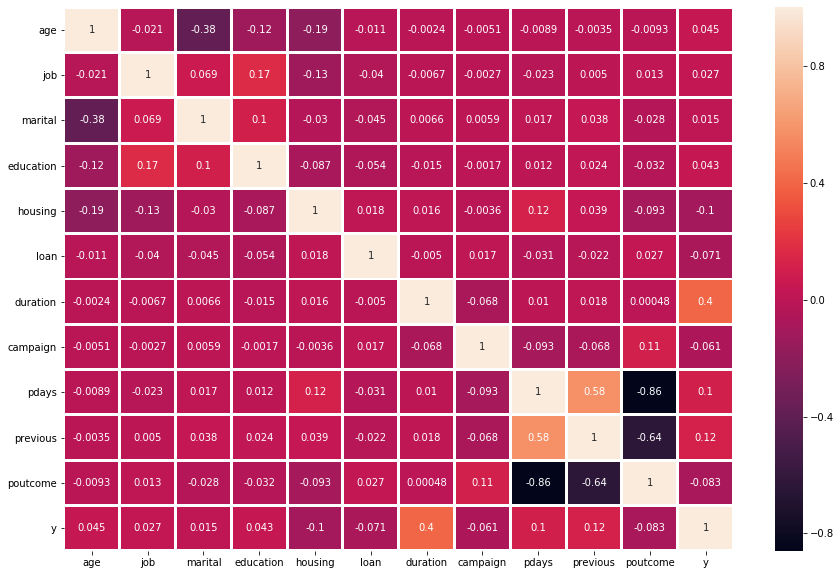

In [15]:
# checking if any of pairs of features that are well correlated to each other so one of it can be removed
plt.figure(figsize=(15,10))
sns.heatmap(bank_data.corr(), annot=True, linewidths=2)
plt.show()

#### Removing one of the correlated columns

In [16]:
bank_data = bank_data.drop('pdays', axis=1)

#### Splitting dataset into train & test set

In [17]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
train = bank_data.sample(frac=0.7, random_state=3)   # selecting random 0.7 fraction of dataset as train set   
# chossing different random state will give different random rows
test = bank_data.drop(train.index)            # selecting remaining i.e. 30% as test set
print('Train set')
print(train.shape)
train.head()

Train set
(3165, 11)


,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,y
3542,2.500000,8,2,2,1,0,0.314465,1,0,4,0
2687,3.823529,10,2,2,0,0,0.238332,1,0,4,0
2053,0.735294,10,3,2,1,0,0.062893,1,0,4,0
3966,3.235294,10,1,2,0,0,0.850712,2,0,4,0
1602,4.117647,1,1,2,1,0,0.658722,4,0,4,0


In [18]:
print('Test set')
print(test.shape)
test.head()

Test set
(1356, 11)


,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,y
1,2.058824,8,2,2,1,1,0.714995,1,4,1,0
7,2.941176,10,2,2,1,0,0.486594,2,0,4,0
8,3.235294,3,2,3,1,0,0.175439,2,0,4,0
13,0.147059,9,3,2,0,0,0.850712,1,0,4,1
14,1.764706,2,2,2,1,1,0.281364,1,1,1,0


#### Creating predictors & target variables in both data set

In [19]:
def create_pred_target(data):   
    """Function returns predictors' matrix & target variable's array for given dataset"""
    y_values = np.array(data['y'])
    x_values = np.ones((1,len(data)))
    
    for col in data.columns:
        if col != 'y':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)

    return x_values, y_values

train_x_values, train_y_values = create_pred_target(train)
test_x_values, test_y_values = create_pred_target(test)

### Building logistic regression model

In [33]:
total = len(train)        # total training records

# initialising all parameters (theta0, theta1,...theta(n)) to 0 
theta = np.zeros(len(train_x_values))

# defining prediction fn using sigmoid function
predict = lambda x_values: 1/(1 + np.exp(-(theta.dot(x_values))))
    
# defining derivative of cost function
def derivate_cost_func(row):
    return (predict(train_x_values) - train_y_values).dot(train_x_values[row])/total

iterations = 100          
alpha = 0.1
    
for _ in range(iterations):
    theta_copy = np.copy(theta)
    for index in range(len(theta_copy)):
        theta[index] = theta_copy[index] - alpha * derivate_cost_func(index)
    

In [34]:
# printing final parameters theta0,theta1,.....,theta(n)
theta

array([-0.13593511, -0.09623321, -0.01771061, -0.19921378, -0.10497756,
       -0.24600235, -0.09352363,  0.63170886, -0.12786696,  0.05329182,
       -0.29721612])

### Evaluating model against train & test set

In [35]:
accuracy_train_set = accuracy(predict(train_x_values), train_y_values)
accuracy_train_set

88.49921011058451

In [36]:
accuracy_test_set = accuracy(predict(test_x_values), test_y_values)
accuracy_test_set

88.49557522123894